# Bike Sharing Assignment - Linear Regression Module 

## Submitted by Dipak Sah 
## Date : 2024-03-10

## Problem Statement 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal 
It is required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing  all the necessary libraries 

In [1]:
# importing required libraries
# for numerical analysis
import numpy as np
# for dataframe and tabular data analysis
import pandas as pd
# for visualizing data
import seaborn as sns
# for visualization and plot settings
import matplotlib.pyplot as plt
# to supress warnings
import warnings
warnings.filterwarnings('ignore')

# for Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### We will take following steps to develop a model.
 1. Reading & understanding data 
 2. Prepare the data for modelling 
 3. Train the model 
 4. Residual analysis 
 5. Predictions and evaluation on the test set 
 6. Optimize the model and evaluate again if needed

## Step 1 --> Reading & understanding  data

In [2]:
# importing the data from CSV file 
bike_data = pd.read_csv('day.csv')
# checking no of row and columns  in the data 
print(bike_data.shape)


(730, 16)


In [3]:
# Checking top 5 records 
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking last 5 records 
bike_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# checking other insights of all the columns 
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Dictonary for fields in the dataset

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [6]:
# Checking for nulls 
bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# checking data types for all columns 
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Looking at above details on the columns we can find below things 
- There are no null values for any of the columns 
- Except columns dteday , all other columns are numerical
- There total of 730 records 

In [8]:
# dropping if there any duplicate records 
bike_data.drop_duplicates(inplace=True)

In [9]:
# checking how many records were dropped 
bike_data.shape

(730, 16)

#### Observation : It looks like there is no duplicate records as the count remains same and it is 730 

In [10]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  Data visualization 

In [11]:
# Some of the categorical variables are using code like season has 1 to 4 . Similarly mnth , weekday and weathersit. Let us map them with actual categorical variable for better visualization 
# let us create a new column for these categorical variables

In [12]:
# Mapping Season code to Season actual value 
bike_data['Season_Name'] = bike_data['season'].map({1 : 'spring' , 2 : 'summer' , 3 : 'fall' ,4 : 'winter'})

In [13]:
# count of records for new columns 
bike_data['Season_Name'].value_counts()

Season_Name
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [14]:
# verifying the count if it is rightly mapped or not
bike_data['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [15]:
# The counts are matching so mapping is correct

In [16]:
# Mapping Month code to Month actual value 
bike_data['Month_Name'] = bike_data['mnth'].map({1 : 'Jan' , 2 : 'Feb' , 3 : 'Mar' , 4 : 'Apr' , 5 : 'May' , 6 : 'Jun' , 7 : 'Jul' , 8 : 'Aug' , 9 : 'Sep' , 10 : 'Oct' , 11 : 'Nov' , 12 : 'Dec'})

In [17]:
bike_data['Month_Name'].value_counts()

Month_Name
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [18]:
# verifying the counts with month code 
bike_data['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [19]:
# The counts are matching so mapping is correct for month 

In [20]:
# Mapping Week day code to Week day actual value 
bike_data['Weekday_Name'] = bike_data['weekday'].map({0 : 'Sun' ,1 : 'Mon' , 2 : 'Tue' , 3 : 'Wed' , 4 : 'Thu' , 5 : 'Fri' , 6 : 'Sat'})

In [21]:
bike_data['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [22]:
# verifying the counts 
bike_data['Weekday_Name'].value_counts()

Weekday_Name
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

In [23]:
# The counts are matching so mapping is correct for weekday

In [24]:
# Mapping Weather code to Actual Weather description  
bike_data['Weather_Type'] = bike_data['weathersit'].map({1 : 'Clear' , 2 : 'Mist' , 3 : 'Light Snow & Rain' , 4 : 'Heavy Snow & Rain'})

In [25]:
bike_data['Weather_Type'].value_counts()

Weather_Type
Clear                463
Mist                 246
Light Snow & Rain     21
Name: count, dtype: int64

In [26]:
# verifying the counts 
bike_data['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [27]:
# The counts are matching so mapping is correct for weathersit and also we observe that there is no record for "Heavy Snow & Rain"

In [28]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Season_Name,Month_Name,Weekday_Name,Weather_Type
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Jan,Sat,Mist
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Jan,Sun,Mist
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Jan,Mon,Clear
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Jan,Tue,Clear
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Jan,Wed,Clear


In [29]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       730 non-null    int64  
 1   dteday        730 non-null    object 
 2   season        730 non-null    int64  
 3   yr            730 non-null    int64  
 4   mnth          730 non-null    int64  
 5   holiday       730 non-null    int64  
 6   weekday       730 non-null    int64  
 7   workingday    730 non-null    int64  
 8   weathersit    730 non-null    int64  
 9   temp          730 non-null    float64
 10  atemp         730 non-null    float64
 11  hum           730 non-null    float64
 12  windspeed     730 non-null    float64
 13  casual        730 non-null    int64  
 14  registered    730 non-null    int64  
 15  cnt           730 non-null    int64  
 16  Season_Name   730 non-null    object 
 17  Month_Name    730 non-null    object 
 18  Weekday_Name  730 non-null    

### Univariate Analysis

In [30]:
# Let us do univariate analysis on the numerical variable which are having continuous  values 
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt',]
# Since cnt is sum of casual & registered so we are not considering casual & registered . Also we will have to drop them for our analysis

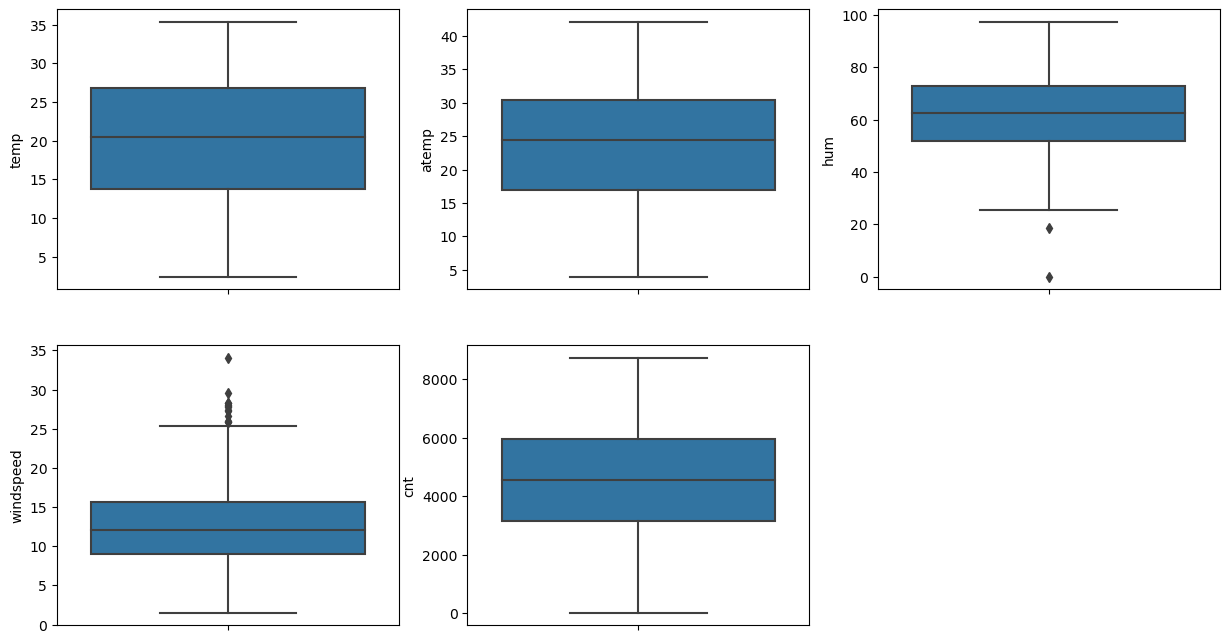

In [31]:
# Let us draw a box plot for these numerical variables 
plt.figure(figsize=(15,8))
plot_number = 1
for col in num_cols:
    plt.subplot(2,3,plot_number)
    sns.boxplot(y=col, data=bike_data)
    plot_number+=1

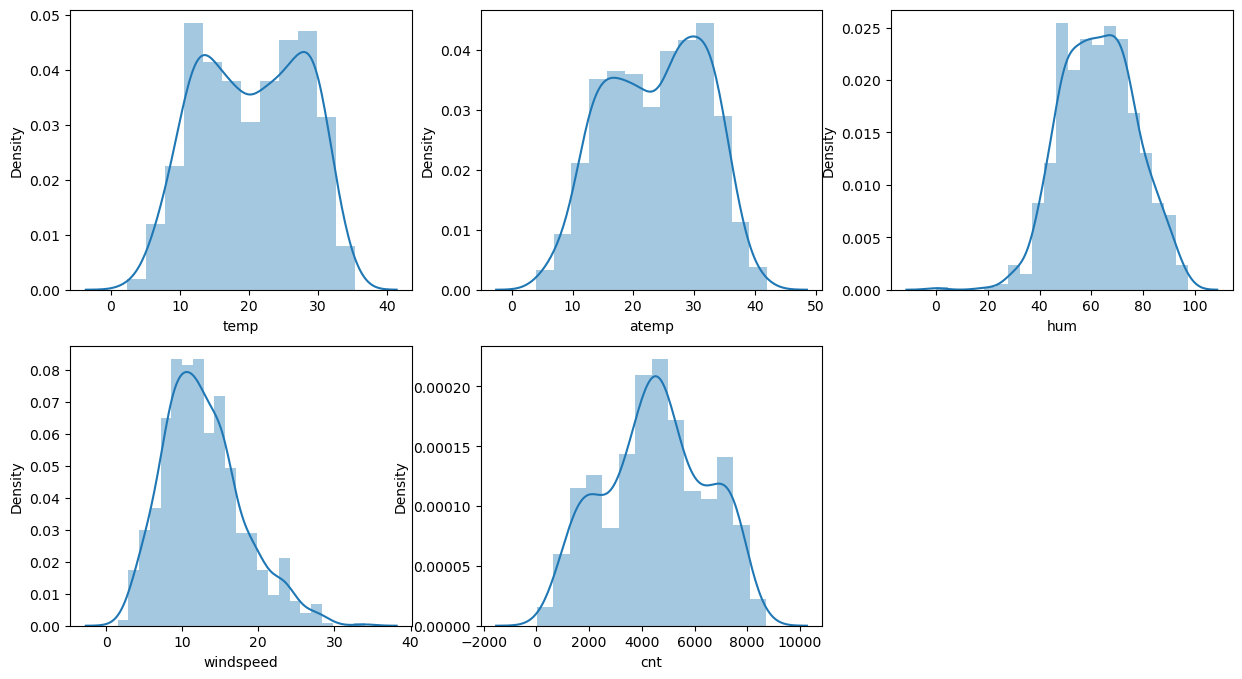

In [32]:
# Let us draw a distplot for these numerical variables 
plt.figure(figsize=(15,8))
plot_number = 1
for col in num_cols:
    plt.subplot(2,3,plot_number)
    sns.distplot(bike_data[str(col)])
    plot_number+=1

### Observation : There is some outliers but not major one

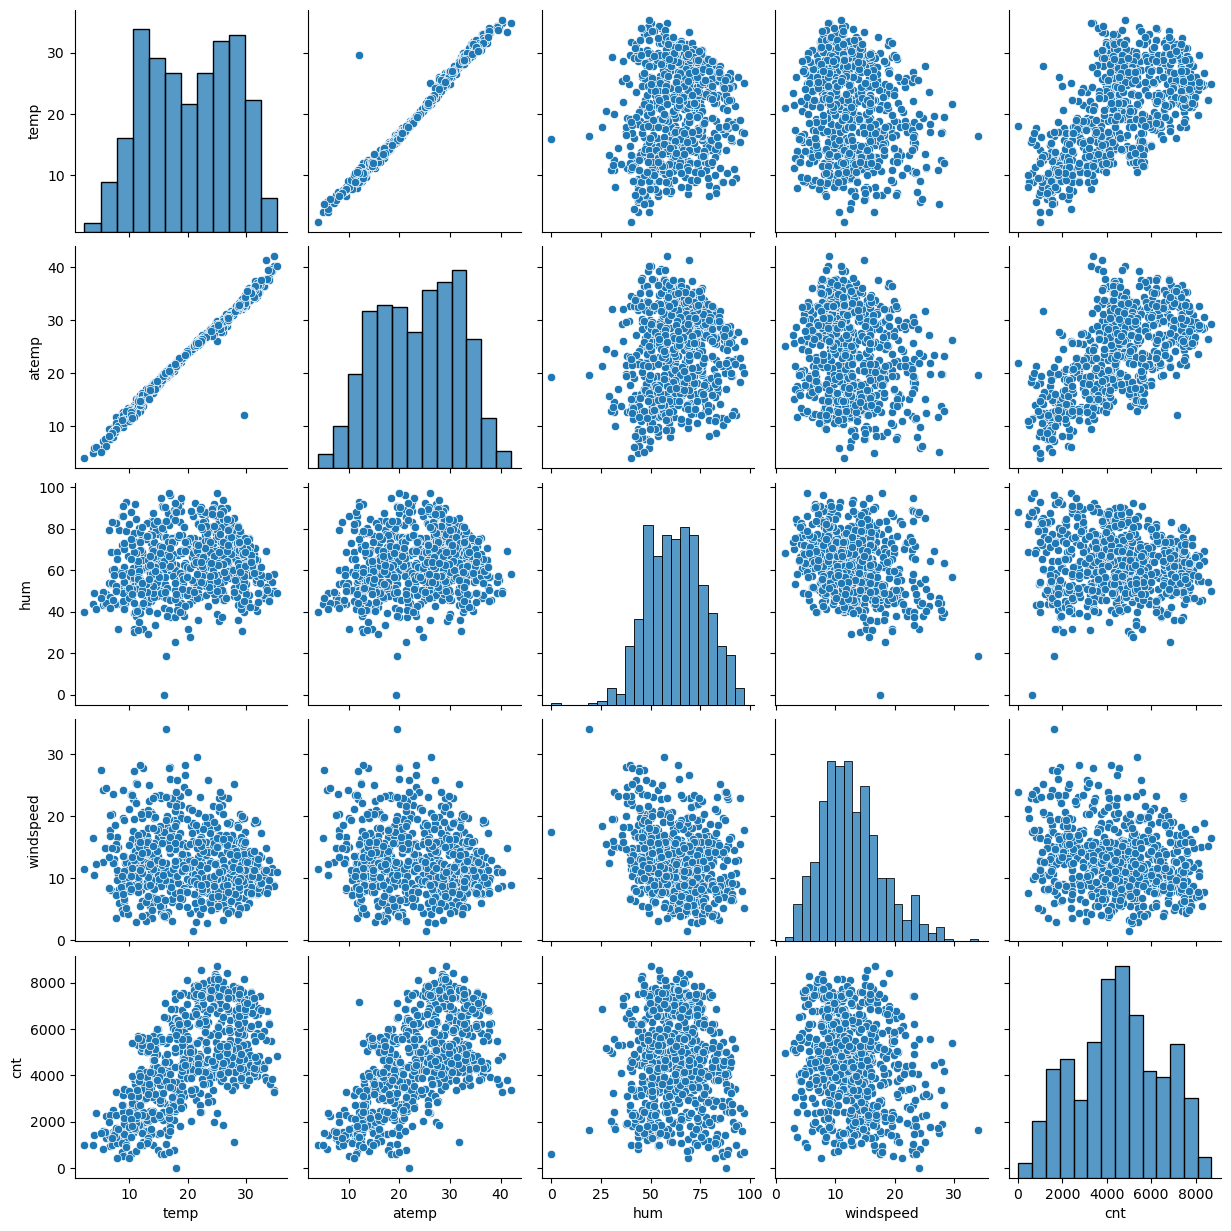

In [33]:
# Let us draw pairplot for visualization 
sns.pairplot(data=bike_data,vars=num_cols)
plt.show()

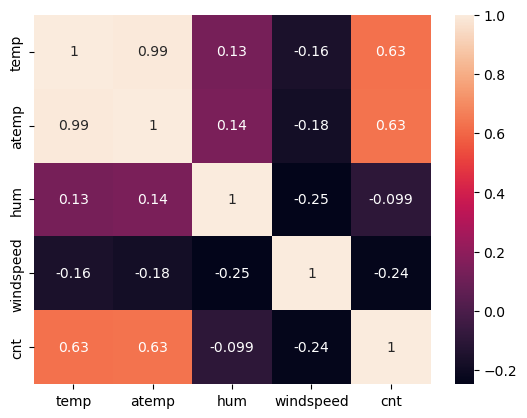

In [34]:
# Let us check co-relation between these numerical variables using heatmap 
sns.heatmap(bike_data[num_cols].corr(),annot=True)
plt.show()

#### Observation on co-relation of count with independent variables 
- There is a positive co-relation between temperature and count of users 
- There is a negative co-relation between count and windspeed(-0.24), which means bike demand is less when we have windy days 
- There is a negative co-relation between count and humidity(-0.099), which means with increase in humidity bike demand goes down  

#### Observation on co-relation between independent variables 
- There is a high co-relation between temp and atemp . One of them has to be dropped for modelling  due to multicolinearity

## Bivariable Analysis 

In [35]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'Season_Name', 'Month_Name',
       'Weekday_Name', 'Weather_Type'],
      dtype='object')

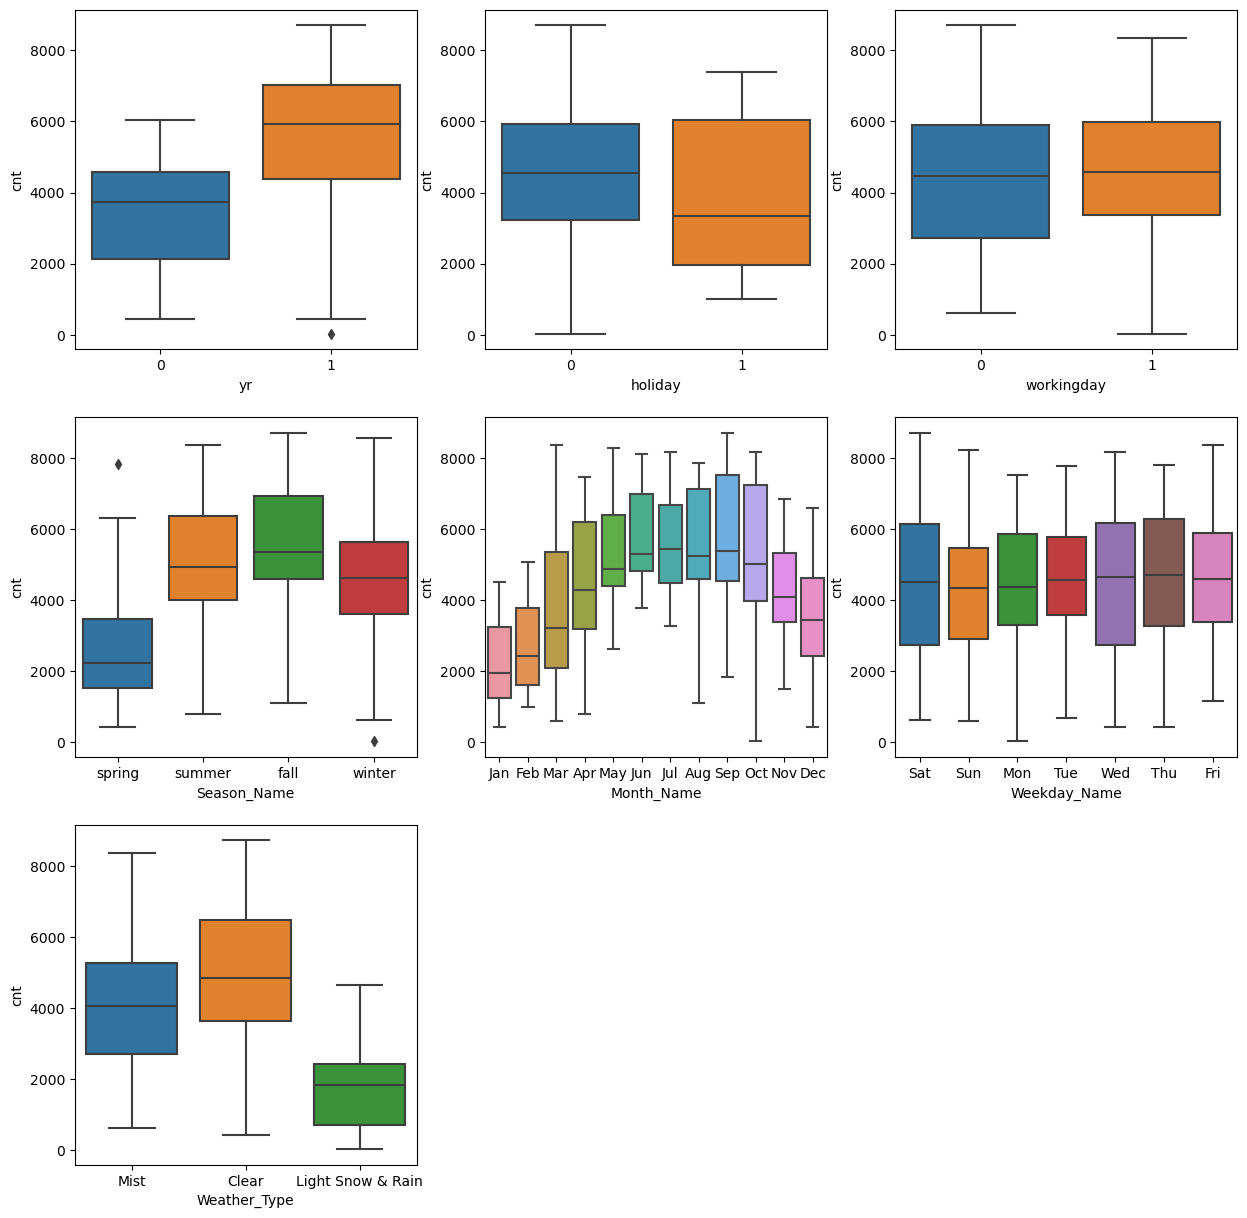

In [36]:
# Let us draw a box plot to understand distribution of categorical values on total count of Bike Shaing Users ie cnt
categorical_cols = ['yr','holiday','workingday','Season_Name', 'Month_Name','Weekday_Name', 'Weather_Type']
plt.figure(figsize=(15,15))
plot_number = 1
for col in categorical_cols:
    plt.subplot(3,3,plot_number)
    sns.boxplot(x=col, y='cnt', data=bike_data)
    plot_number+=1

### Observations : 
- When weather is clear, we see there are more users using bike 
- When we have snow or rain , the count users reduce drastically which is also very natural 
- From May to October, median of no of bike users are higher with July being highest 
- Median for no of bike users is highest in season of Fall and lowest in the season of spring 
- No of bike users has increased in year of 2019 compared to 2018
- Median of no of users is almost normally distributed across the days of the week  


### Multivariate analysis 

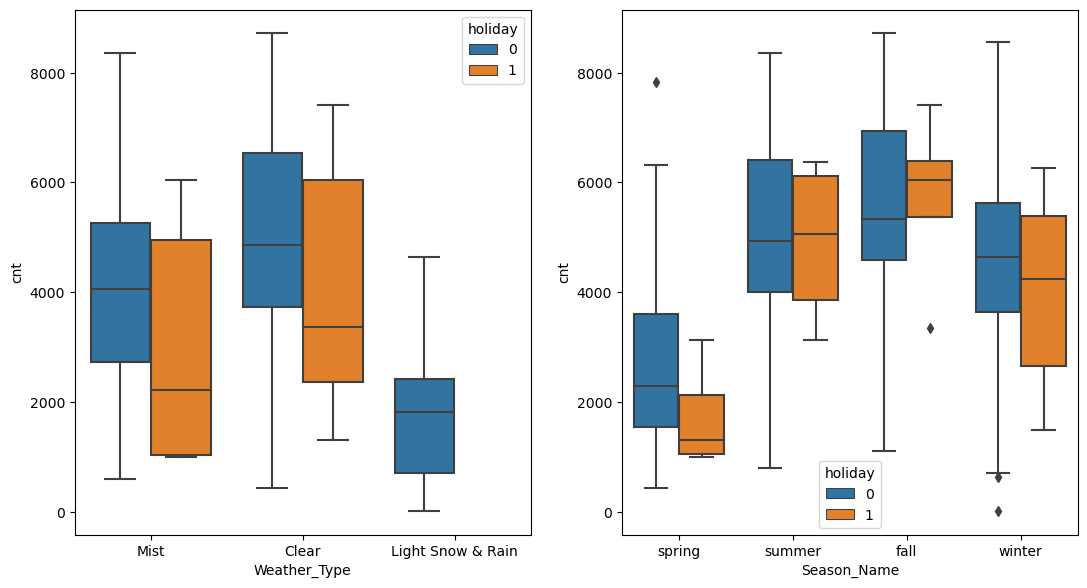

In [37]:
# Multivariate plot
plt.figure(figsize=(20, 15))

plt.subplot(2,3,1)
sns.boxplot(x = 'Weather_Type', y = 'cnt', hue = 'holiday', data = bike_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'Season_Name', y = 'cnt', hue = 'holiday', data = bike_data)

plt.show()

### Observation :

- when weather is clear, median of bike users is high on non-holiday day compared to holiday
- when season is fall , median of bike users is high on holiday compared to non-holiday day 
- When season is winter, median of bike users is high on non-holiday compared to holiday

## Step 2 --> Prepare the data for modelling 

In [38]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Season_Name,Month_Name,Weekday_Name,Weather_Type
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Jan,Sat,Mist
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Jan,Sun,Mist
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Jan,Mon,Clear
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Jan,Tue,Clear
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Jan,Wed,Clear


### Observations:

- columns instant is just record number so it is of no use for our analysis - let us drop it 
- dteday : it is date which is already divided in yr month and weekday so this is also something we can drop 
- we have to convert categorical variables into dummy variables so we will drop season mnth weekday and weathersit as we already have respective mapped variables 
- our target variable is cnt which is sum of causal and resgistered so we also have to drop causal and registered as they will not be useful in our modelling 

In [39]:
#dropping the variables as observed above 
bike_data.drop(['instant','dteday','season','mnth','weekday','weathersit','casual','registered'],axis =1,inplace=True )

In [40]:
# verifying the data after dropping above columns 
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Season_Name,Month_Name,Weekday_Name,Weather_Type
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,spring,Jan,Sat,Mist
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,spring,Jan,Sun,Mist
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Jan,Mon,Clear
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Jan,Tue,Clear
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Jan,Wed,Clear


In [41]:
# re-verifying the shape of the data 
bike_data.shape

(730, 12)

##### Dummy Variables 

In [42]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a diction

In [43]:
# Let us create dummy variables for all the categorical variables 
categorical_cols = ['Season_Name', 'Month_Name', 'Weekday_Name', 'Weather_Type']
dummy_data = pd.get_dummies(bike_data[categorical_cols],drop_first=True,dtype='int')

In [44]:
dummy_data.head()

,Season_Name_spring,Season_Name_summer,Season_Name_winter,Month_Name_Aug,Month_Name_Dec,Month_Name_Feb,Month_Name_Jan,Month_Name_Jul,Month_Name_Jun,Month_Name_Mar,...,Month_Name_Oct,Month_Name_Sep,Weekday_Name_Mon,Weekday_Name_Sat,Weekday_Name_Sun,Weekday_Name_Thu,Weekday_Name_Tue,Weekday_Name_Wed,Weather_Type_Light Snow & Rain,Weather_Type_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
# concate the dummies with bike_data 
bike_data = pd.concat([bike_data,dummy_data],axis=1)

In [46]:
# To veiw all columns in the data frame 
pd.set_option('display.max_columns',None)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Season_Name,Month_Name,Weekday_Name,Weather_Type,Season_Name_spring,Season_Name_summer,Season_Name_winter,Month_Name_Aug,Month_Name_Dec,Month_Name_Feb,Month_Name_Jan,Month_Name_Jul,Month_Name_Jun,Month_Name_Mar,Month_Name_May,Month_Name_Nov,Month_Name_Oct,Month_Name_Sep,Weekday_Name_Mon,Weekday_Name_Sat,Weekday_Name_Sun,Weekday_Name_Thu,Weekday_Name_Tue,Weekday_Name_Wed,Weather_Type_Light Snow & Rain,Weather_Type_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,spring,Jan,Sat,Mist,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,spring,Jan,Sun,Mist,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Jan,Mon,Clear,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Jan,Tue,Clear,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Jan,Wed,Clear,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
bike_data.shape 

(730, 34)

In [48]:
# For modelling , we do not need columns Season_Name,Month_Name,Weekday_Name & Weather_Type for which we have already created dummy variables 
bike_data.drop(categorical_cols , axis=1,inplace=True)

In [49]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Season_Name_spring,Season_Name_summer,Season_Name_winter,Month_Name_Aug,Month_Name_Dec,Month_Name_Feb,Month_Name_Jan,Month_Name_Jul,Month_Name_Jun,Month_Name_Mar,Month_Name_May,Month_Name_Nov,Month_Name_Oct,Month_Name_Sep,Weekday_Name_Mon,Weekday_Name_Sat,Weekday_Name_Sun,Weekday_Name_Thu,Weekday_Name_Tue,Weekday_Name_Wed,Weather_Type_Light Snow & Rain,Weather_Type_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
bike_data.shape

(730, 30)

In [51]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   temp                            730 non-null    float64
 4   atemp                           730 non-null    float64
 5   hum                             730 non-null    float64
 6   windspeed                       730 non-null    float64
 7   cnt                             730 non-null    int64  
 8   Season_Name_spring              730 non-null    int32  
 9   Season_Name_summer              730 non-null    int32  
 10  Season_Name_winter              730 non-null    int32  
 11  Month_Name_Aug                  730 non-null    int32  
 12  Month_Name_Dec                  730 

### Splitting entire dataset into train and test dataset 

In [52]:
df_train, df_test =  train_test_split(bike_data,train_size=0.7,random_state=100)

In [53]:
# verifying the shape after split
print('Shape of Train data :',df_train.shape)
print('Shape of Test data :',df_test.shape)

Shape of Train data : (510, 30)
Shape of Test data : (220, 30)


In [54]:
# verifying train data set 
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Season_Name_spring,Season_Name_summer,Season_Name_winter,Month_Name_Aug,Month_Name_Dec,Month_Name_Feb,Month_Name_Jan,Month_Name_Jul,Month_Name_Jun,Month_Name_Mar,Month_Name_May,Month_Name_Nov,Month_Name_Oct,Month_Name_Sep,Weekday_Name_Mon,Weekday_Name_Sat,Weekday_Name_Sun,Weekday_Name_Thu,Weekday_Name_Tue,Weekday_Name_Wed,Weather_Type_Light Snow & Rain,Weather_Type_Mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
# verifying test data set 
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Season_Name_spring,Season_Name_summer,Season_Name_winter,Month_Name_Aug,Month_Name_Dec,Month_Name_Feb,Month_Name_Jan,Month_Name_Jul,Month_Name_Jun,Month_Name_Mar,Month_Name_May,Month_Name_Nov,Month_Name_Oct,Month_Name_Sep,Weekday_Name_Mon,Weekday_Name_Sat,Weekday_Name_Sun,Weekday_Name_Thu,Weekday_Name_Tue,Weekday_Name_Wed,Weather_Type_Light Snow & Rain,Weather_Type_Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### Rescaling the features 

In [56]:
# instantiate an object 
scaler = MinMaxScaler()

In [57]:
# Applying the scaler() to all the numeric columns with continuous values except true/false variable and dummy variables which we created 
scale_cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[scale_cols].head()

,temp,atemp,hum,windspeed,cnt
576,29.246653,33.1448,70.4167,11.083475,7216
426,16.980847,20.6746,62.1250,10.792293,4066
728,10.489153,11.5850,48.3333,23.500518,1796
482,15.443347,18.8752,48.9583,8.708325,4220
111,13.803347,16.0977,72.9583,14.707907,1683


In [58]:
# fit on data 
df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])

In [59]:
# verifying the numeric columns after scaling 
df_train[scale_cols].head()

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [60]:
df_train[scale_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# after scaling , all the max value are 1 , which means scaling looks good.

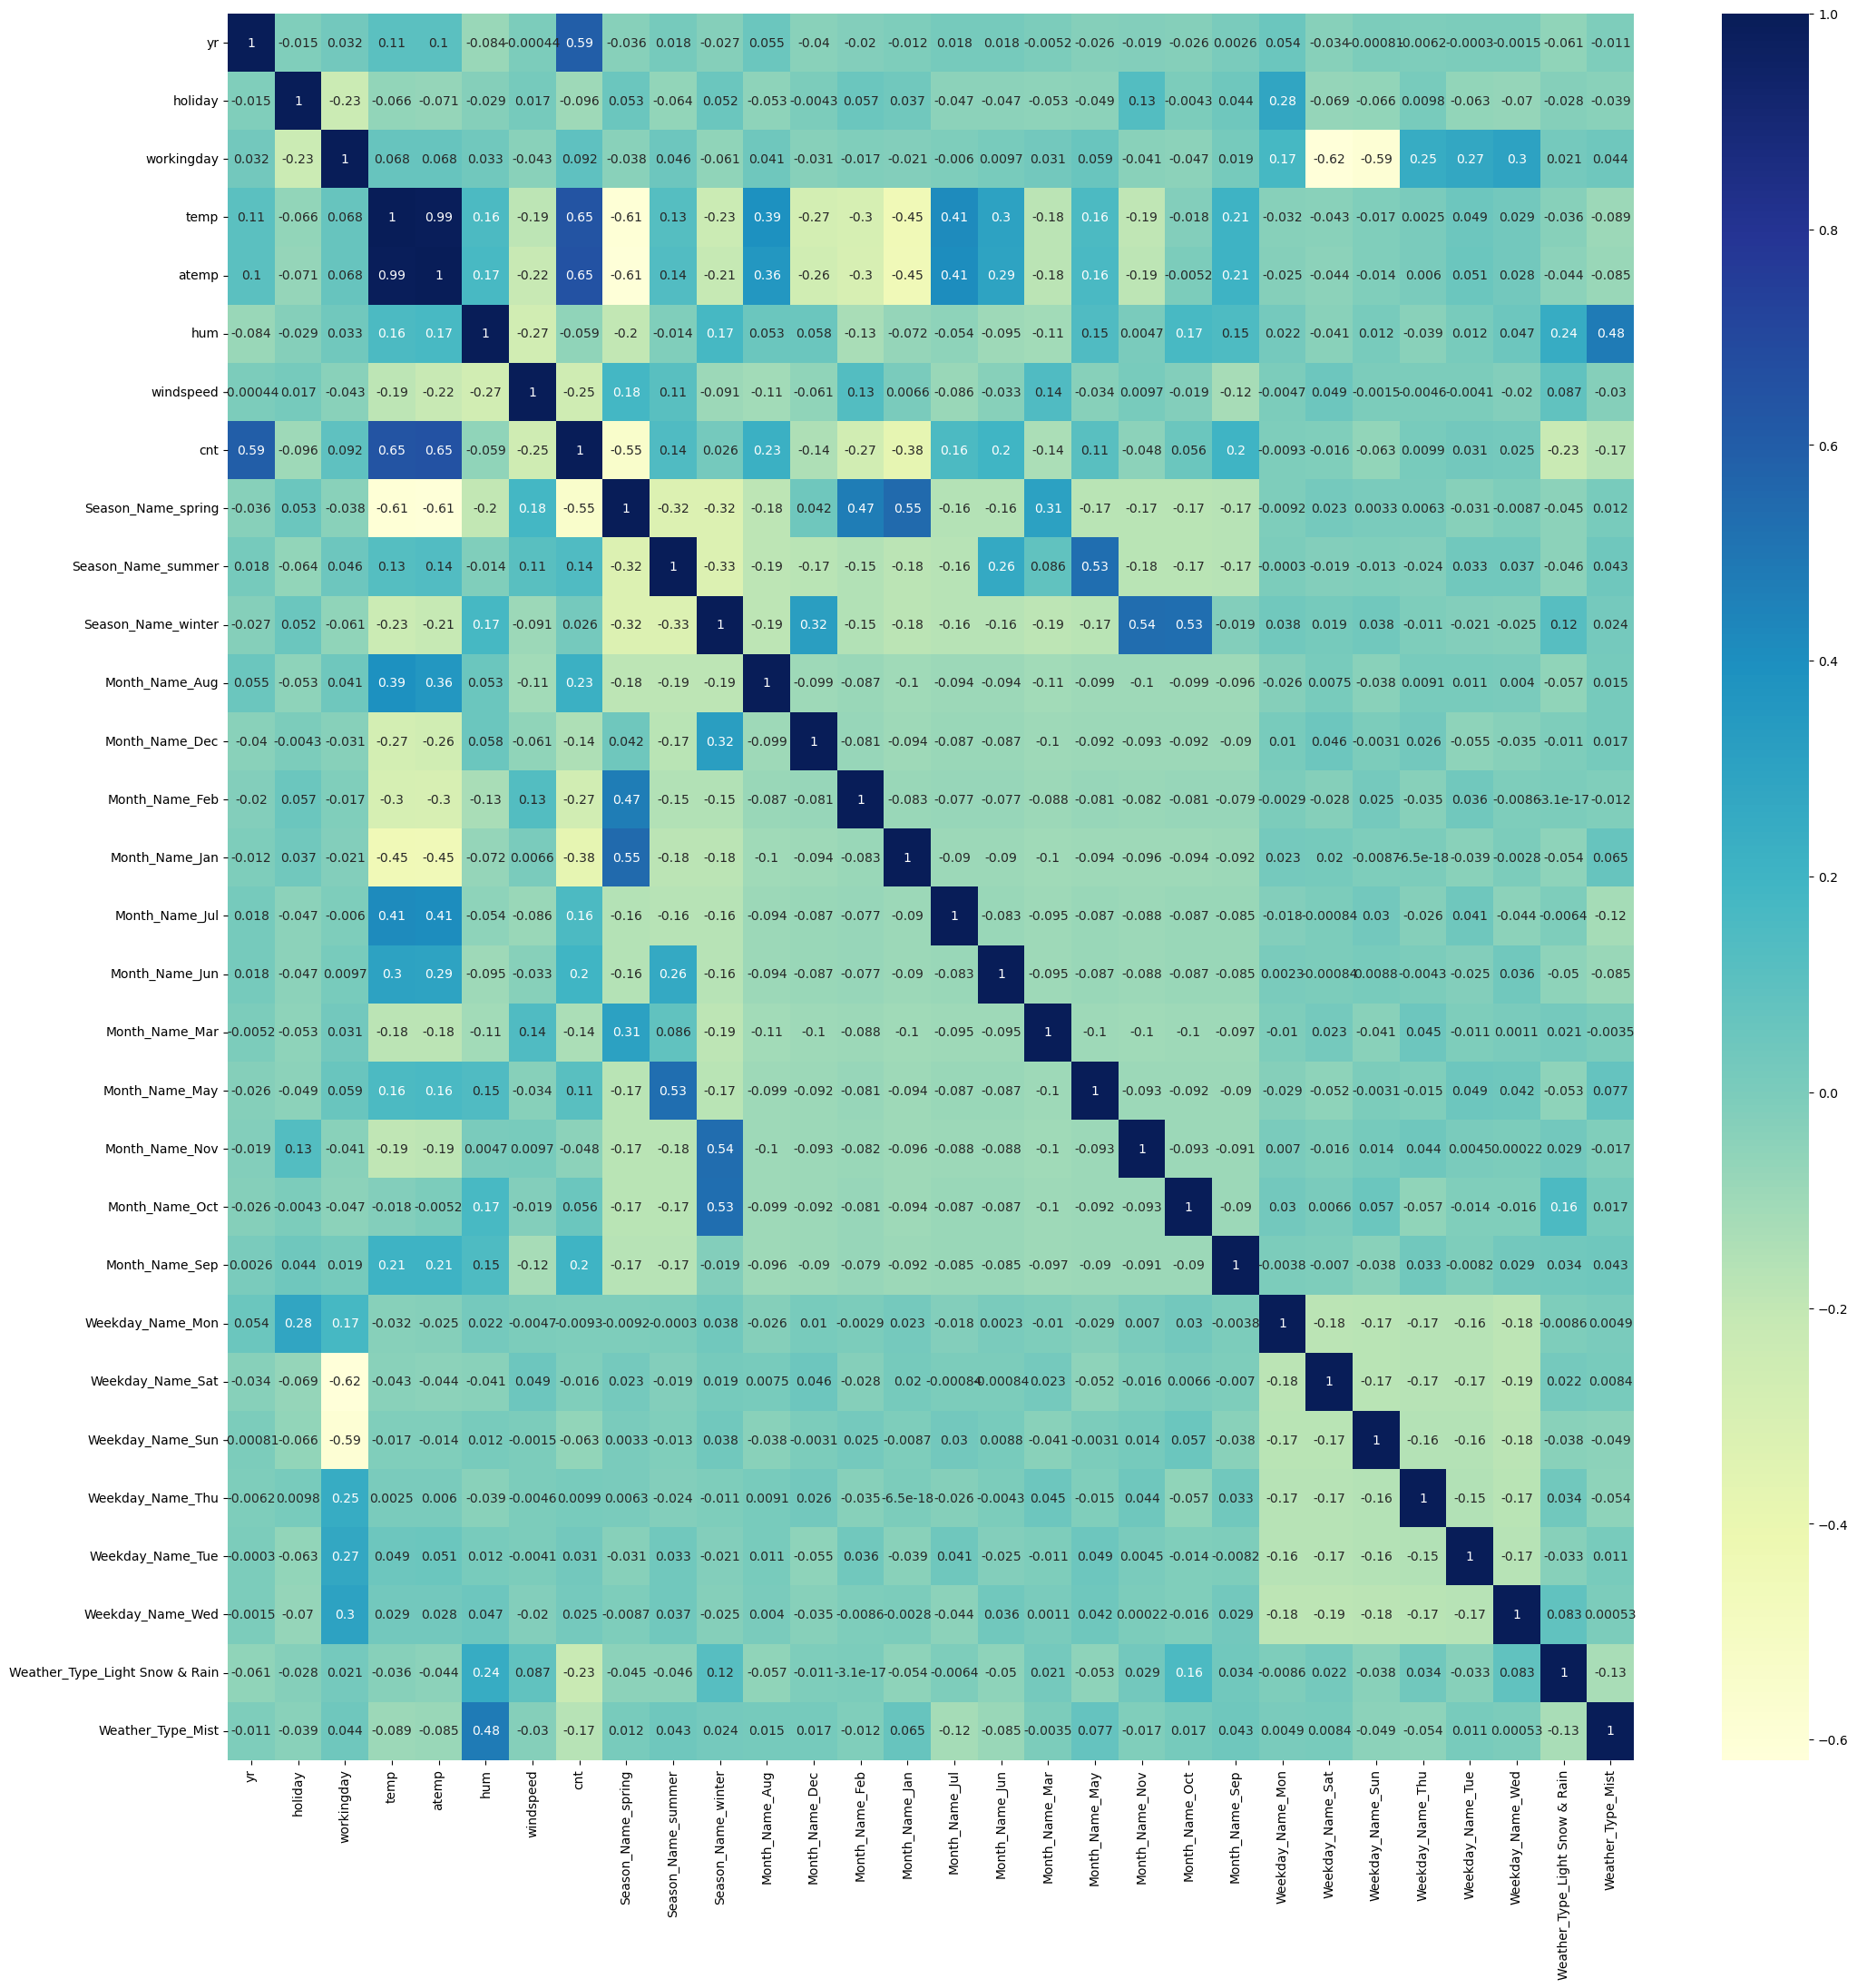

In [62]:
# heat map to check co-relation between all the variables 
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

### Observation 
- Again we can see temp and atemp has highest co-relation 
- Total Count(cnt) of users has co-relation with temp and atemp 
- Total Count(cnt) has negative co-relation with spring weather and january month 
- Winter season has good corelation with month october and november 
- Spring season has corelation with month January and February 
- Summer season has corelation with month of may 
- Mist weather has corelation with humidity 

## Step 3 --> Train the model & Optimize the model and evaluate again if needed

### Building a Linear Regression Model 

In [63]:
# Creating X_train, y_train 
y_train = df_train.pop('cnt')
X_train = df_train 

In [64]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Season_Name_spring,Season_Name_summer,Season_Name_winter,Month_Name_Aug,Month_Name_Dec,Month_Name_Feb,Month_Name_Jan,Month_Name_Jul,Month_Name_Jun,Month_Name_Mar,Month_Name_May,Month_Name_Nov,Month_Name_Oct,Month_Name_Sep,Weekday_Name_Mon,Weekday_Name_Sat,Weekday_Name_Sun,Weekday_Name_Thu,Weekday_Name_Tue,Weekday_Name_Wed,Weather_Type_Light Snow & Rain,Weather_Type_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
X_train.shape

(510, 29)

#### Building 1st Model with all features

In [66]:
# Building 1st LR Model
X_train_model1 = sm.add_constant(X_train)
lr1 = sm.OLS(y_train,X_train_model1)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.81e-180
Time:                        17:28:08   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2433      0.035      6.887      0.000       0.174       0.313
yr                                 0.2325      0.008     28.794      0.000       0.217       0.248
holiday                            0.0109      0.024      0.451      0.652      -0.037       0.058
workingday                         0.0963      0.012      7.835      0.000       0.072       0.120
temp                               0.3880      0.142      2.727      0.007       0.108       0.668
atemp                              0.0590      0.138      0.426      0.670      -0.213       0.331
hum                               -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                         -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Season_Name_spring                -0.0454      0.030     -1.511      0.131      -0.104       0.014
Season_Name_summer                 0.0424      0.026      1.617      0.107      -0.009       0.094
Season_Name_winter                 0.1071      0.028      3.826      0.000       0.052       0.162
Month_Name_Aug                     0.0223      0.034      0.657      0.511      -0.044       0.089
Month_Name_Dec                    -0.0443      0.034     -1.316      0.189      -0.110       0.022
Month_Name_Feb                    -0.0323      0.033     -0.980      0.327      -0.097       0.032
Month_Name_Jan                    -0.0631      0.034     -1.876      0.061      -0.129       0.003
Month_Name_Jul                    -0.0327      0.035     -0.931      0.352      -0.102       0.036
Month_Name_Jun                     0.0060      0.025      0.241      0.810      -0.043       0.055
Month_Name_Mar                     0.0016      0.025      0.063      0.950      -0.047       0.050
Month_Name_May                     0.0255      0.021      1.208      0.228      -0.016       0.067
Month_Name_Nov                    -0.0398      0.036     -1.093      0.275      -0.111       0.032
Month_Name_Oct                     0.0077      0.036      0.215      0.830      -0.063       0.078
Month_Name_Sep                     0.0868      0.032      2.711      0.007       0.024       0.150
Weekday_Name_Mon                  -0.0216      0.015     -1.401      0.162      -0.052       0.009
Weekday_Name_Sat                   0.0952      0.014      6.910      0.000       0.068       0.122
Weekday_Name_Sun                   0.0410      0.014      2.929      0.004       0.013       0.068
Weekday_Name_Thu                  -0.0097      0.016     -0.623      0.534      -0.040       0.021
Weekday_Name_Tue                  -0.0184      0.016     -1.184      0.237      -0.049       0.012
Weekday_Name_Wed                  -0.0059      0.015     -0.394      0.694      -0.035       0.023
Weather_Type_L

#### Observation 
- R-squared:    	0.853 
- Adj. R-squared:	0.844 , it looks very good
- let us see if we can reduce any features which is not much relevant in explaining target variable cnt. Let us use RFE to find out features more relevant to cnt

In [67]:
# Let us use RFE Recursive Feature Elimination method to find the features for modelling 
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [68]:
# Checking list of variables identified by RFE 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Season_Name_spring', True, 1),
 ('Season_Name_summer', True, 1),
 ('Season_Name_winter', True, 1),
 ('Month_Name_Aug', False, 12),
 ('Month_Name_Dec', False, 4),
 ('Month_Name_Feb', False, 5),
 ('Month_Name_Jan', False, 2),
 ('Month_Name_Jul', True, 1),
 ('Month_Name_Jun', False, 10),
 ('Month_Name_Mar', False, 15),
 ('Month_Name_May', False, 6),
 ('Month_Name_Nov', False, 3),
 ('Month_Name_Oct', False, 11),
 ('Month_Name_Sep', True, 1),
 ('Weekday_Name_Mon', False, 7),
 ('Weekday_Name_Sat', True, 1),
 ('Weekday_Name_Sun', True, 1),
 ('Weekday_Name_Thu', False, 9),
 ('Weekday_Name_Tue', False, 8),
 ('Weekday_Name_Wed', False, 13),
 ('Weather_Type_Light Snow & Rain', True, 1),
 ('Weather_Type_Mist', True, 1)]

In [69]:
# List of columns selected by RFE 
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Season_Name_spring', 'Season_Name_summer', 'Season_Name_winter',
       'Month_Name_Jul', 'Month_Name_Sep', 'Weekday_Name_Sat',
       'Weekday_Name_Sun', 'Weather_Type_Light Snow & Rain',
       'Weather_Type_Mist'],
      dtype='object')

In [70]:
model_cols = X_train.columns[rfe.support_]

In [71]:

# Defining a function to check VIF for analysis 
# create a data frame that wil contain the names of all features variables and their respective VIF 
def checkVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by= 'VIF', ascending=False)
    return vif
    

In [72]:
# features to be modelled after RFE
X_train2 = X_train[model_cols]


### We will follow below steps to get to a desired model: 
1. Build a model containing all variables 
2. Check VIF and summary 
3. Remove variables with high VIF (>5 generally) and which are insignificant (p>0.05), one by one 
4. If the model has variables which have a high VIF and are significant, check and remove other 
insignificant variables  
5. After removing the insignificant variables, the VIFs should decline 
6. If some variables still have a high VIF, remove the variable which is relatively less significant 
7. Now, variables must be significant. If the number of variables is still high, remove them in order of 
insignificance until you arrive at a limited number of variables that explain the model well.

#### Building 2nd Model wih feature selected from RFE

In [73]:
# Building 2nd LR Model
X_train_model2 = sm.add_constant(X_train2)
lr2 = sm.OLS(y_train,X_train_model2)
lr_model2 = lr2.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.11e-191
Time:                        17:28:08   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1995      0.028      7.200      0.000       0.145       0.254
yr                                 0.2298      0.008     28.647      0.000       0.214       0.246
holiday                           -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                         0.0837      0.010      8.665      0.000       0.065       0.103
temp                               0.5277      0.033     15.884      0.000       0.462       0.593
hum                               -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                         -0.1809      0.025     -7.118      0.000      -0.231      -0.131
Season_Name_spring                -0.0555      0.021     -2.698      0.007      -0.096      -0.015
Season_Name_summer                 0.0537      0.015      3.631      0.000       0.025       0.083
Season_Name_winter                 0.0992      0.017      5.815      0.000       0.066       0.133
Month_Name_Jul                    -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Month_Name_Sep                     0.0820      0.017      4.966      0.000       0.050       0.114
Weekday_Name_Sat                   0.0937      0.012      8.040      0.000       0.071       0.117
Weekday_Name_Sun                   0.0406      0.012      3.315      0.001       0.017       0.065
Weather_Type_Light Snow & Rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Weather_Type_Mist                 -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
# Check VIF 
checkVIF(X_train2)

,Features,VIF
2,workingday,50.68
11,Weekday_Name_Sat,12.20
12,Weekday_Name_Sun,11.79
6,Season_Name_spring,5.02
3,temp,3.62
8,Season_Name_winter,3.49
1,holiday,2.91
7,Season_Name_summer,2.62
4,hum,1.91
14,Weather_Type_Mist,1.57


#### Observation 
- R-squared:	0.847  , close to value obtained in Model 1
- Adj. R-squared:	0.843 , close to value obtained in Model 1
- So there is very very less drop in above R2 and Adjusted R2 with select features
- holiday has high P Value of 0.386  so let us eleminate this and build a 3rd model 

In [75]:
X_train3 = X_train2.drop(['holiday'],axis=1)

#### Building 3rd LR Model 

In [76]:
# Building 3rd LR Model
X_train_model3 = sm.add_constant(X_train3)
lr3 = sm.OLS(y_train,X_train_model3)
lr_model3 = lr3.fit()
lr_model3.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.11e-191
Time:                        17:28:08   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1811      0.042      4.301      0.000       0.098       0.264
yr                                 0.2298      0.008     28.647      0.000       0.214       0.246
workingday                         0.1021      0.025      4.024      0.000       0.052       0.152
temp                               0.5277      0.033     15.884      0.000       0.462       0.593
hum                               -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                         -0.1809      0.025     -7.118      0.000      -0.231      -0.131
Season_Name_spring                -0.0555      0.021     -2.698      0.007      -0.096      -0.015
Season_Name_summer                 0.0537      0.015      3.631      0.000       0.025       0.083
Season_Name_winter                 0.0992      0.017      5.815      0.000       0.066       0.133
Month_Name_Jul                    -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Month_Name_Sep                     0.0820      0.017      4.966      0.000       0.050       0.114
Weekday_Name_Sat                   0.1121      0.027      4.181      0.000       0.059       0.165
Weekday_Name_Sun                   0.0591      0.027      2.192      0.029       0.006       0.112
Weather_Type_Light Snow & Rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Weather_Type_Mist                 -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Check VIF after removing holiday feature 
checkVIF(X_train3)

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,Weekday_Name_Sat,4.91
5,Season_Name_spring,4.80
11,Weekday_Name_Sun,4.76
7,Season_Name_winter,3.69
6,Season_Name_summer,3.04
13,Weather_Type_Mist,2.31


#### Observation :
- R-squared:	0.847  , it is same when compared to model 2
- Adj. R-squared:	0.843 , it is same when compared to model 2
- None of the feature has P-value > 0.05 , so all the features look significant 
- But we can see that hum feature has high VIF ie 32.10 . let us drop this and build a new model

In [78]:
# humidity has high VIF 32.10 , let us drop this and build 4th model
X_train4 = X_train3.drop(['hum'],axis=1)


#### Building 4th LR Model

In [79]:
# Building 4th LR Model 
X_train_model4 = sm.add_constant(X_train4)
lr4 = sm.OLS(y_train,X_train_model4)
lr_model4 = lr4.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.28e-188
Time:                        17:28:08   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1008      0.038      2.624      0.009       0.025       0.176
yr                                 0.2337      0.008     28.828      0.000       0.218       0.250
workingday                         0.1029      0.026      3.983      0.000       0.052       0.154
temp                               0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                         -0.1491      0.025     -6.024      0.000      -0.198      -0.100
Season_Name_spring                -0.0655      0.021     -3.147      0.002      -0.106      -0.025
Season_Name_summer                 0.0477      0.015      3.180      0.002       0.018       0.077
Season_Name_winter                 0.0846      0.017      4.971      0.000       0.051       0.118
Month_Name_Jul                    -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Month_Name_Sep                     0.0759      0.017      4.537      0.000       0.043       0.109
Weekday_Name_Sat                   0.1146      0.027      4.201      0.000       0.061       0.168
Weekday_Name_Sun                   0.0567      0.027      2.069      0.039       0.003       0.111
Weather_Type_Light Snow & Rain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Weather_Type_Mist                 -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Check VIF 
checkVIF(X_train4) 

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,Weekday_Name_Sat,4.45
10,Weekday_Name_Sun,4.21
4,Season_Name_spring,3.82
6,Season_Name_winter,2.78
5,Season_Name_summer,2.76
0,yr,2.07
7,Month_Name_Jul,1.60


#### Observation 
- R-squared:	0.841
- Adj. R-squared:	0.837
- There is a minor dip in R2 and Adj R2 after dropping humidity feature 
- All the features have P-value < 0.05 
- But we notice that workingday feature has high VIF ie 16.19 , let us drop this and build a new model

In [81]:
# workingday has high VIF ie 16.19 , let us drop this and build new model
X_train5 = X_train4.drop(['workingday'],axis=1) 

### Building 5th LR Model 

In [82]:
# Building 5th LR Model 
X_train_model5 = sm.add_constant(X_train5)
lr5 = sm.OLS(y_train,X_train_model5)
lr_model5 = lr5.fit()
lr_model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.06e-186
Time:                        17:28:08   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2003      0.030      6.760      0.000       0.142       0.259
yr                                 0.2342      0.008     28.467      0.000       0.218       0.250
temp                               0.4928      0.033     14.847      0.000       0.428       0.558
windspeed                         -0.1513      0.025     -6.025      0.000      -0.201      -0.102
Season_Name_spring                -0.0681      0.021     -3.225      0.001      -0.110      -0.027
Season_Name_summer                 0.0481      0.015      3.159      0.002       0.018       0.078
Season_Name_winter                 0.0816      0.017      4.731      0.000       0.048       0.116
Month_Name_Jul                    -0.0488      0.019     -2.618      0.009      -0.085      -0.012
Month_Name_Sep                     0.0723      0.017      4.264      0.000       0.039       0.106
Weekday_Name_Sat                   0.0157      0.011      1.370      0.171      -0.007       0.038
Weekday_Name_Sun                  -0.0421      0.012     -3.548      0.000      -0.065      -0.019
Weather_Type_Light Snow & Rain    -0.2848      0.025    -11.530      0.000      -0.333      -0.236
Weather_Type_Mist                 -0.0802      0.009     -9.170      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Check VIF 
checkVIF(X_train5)

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,Season_Name_summer,2.24
3,Season_Name_spring,2.11
0,yr,2.07
5,Season_Name_winter,1.82
6,Month_Name_Jul,1.59
11,Weather_Type_Mist,1.55
7,Month_Name_Sep,1.33
8,Weekday_Name_Sat,1.22


#### Observation 
- R-squared:	0.836
- Adj. R-squared:	0.832
- There is a minor dip in R2 and Adj R2 after dropping workingday feature 
- All the features have P-value < 0.05 except Weekday_Name_Sat where it has P-value as 0.171 . Let us drop this and build new model
- Also VIF is dropping for all features 

In [84]:
# Weekday_Name_Sat is having P-value of 0.171 , let us drop this and build new model
X_train6 = X_train5.drop(['Weekday_Name_Sat'],axis=1)

### Building 6th LR Model

In [85]:
# Building 6th LR Model  
X_train_model6 = sm.add_constant(X_train6)
lr6 = sm.OLS(y_train,X_train_model6)
lr_model6 = lr6.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          3.37e-187
Time:                        17:28:08   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2034      0.030      6.877      0.000       0.145       0.261
yr                                 0.2339      0.008     28.414      0.000       0.218       0.250
temp                               0.4917      0.033     14.805      0.000       0.426       0.557
windspeed                         -0.1497      0.025     -5.963      0.000      -0.199      -0.100
Season_Name_spring                -0.0682      0.021     -3.227      0.001      -0.110      -0.027
Season_Name_summer                 0.0479      0.015      3.145      0.002       0.018       0.078
Season_Name_winter                 0.0818      0.017      4.739      0.000       0.048       0.116
Month_Name_Jul                    -0.0483      0.019     -2.587      0.010      -0.085      -0.012
Month_Name_Sep                     0.0723      0.017      4.260      0.000       0.039       0.106
Weekday_Name_Sun                  -0.0450      0.012     -3.847      0.000      -0.068      -0.022
Weather_Type_Light Snow & Rain    -0.2847      0.025    -11.513      0.000      -0.333      -0.236
Weather_Type_Mist                 -0.0802      0.009     -9.161      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Check VIF 
checkVIF(X_train6)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,Season_Name_summer,2.23
3,Season_Name_spring,2.09
0,yr,2.07
5,Season_Name_winter,1.80
6,Month_Name_Jul,1.59
10,Weather_Type_Mist,1.55
7,Month_Name_Sep,1.33
8,Weekday_Name_Sun,1.17


#### Observation 
- R-squared:	0.836
- Adj. R-squared:	0.832
- There is no change in R2 and Adj R2 after dropping weekday Saturday feature 
- All the features have P-value < 0.05 which is in acceptable limit
- All VIFs values are < 5 except temperature. We can not drop temperature because it has high co-relation with cnt, our target variable.
- Looks like lr_model6 is significant model
- Adjusted R-squared value has dropped from 84.4% with all features to just 83.6% using 11 features. 

## Step 4 -->  Residual Analysis 

In [87]:
# let us calculate y_train_pred
y_train_pred = lr_model6.predict(X_train_model6)

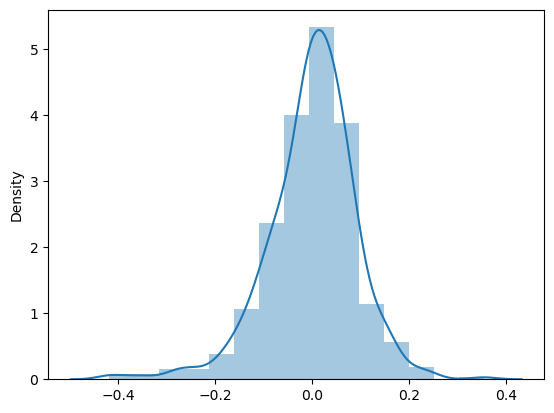

In [88]:
# plotting the error 
res = y_train - y_train_pred
sns.distplot(res,bins=15)
plt.show()

##### Observation : - distribution of error terms is normal and mean is zero. 

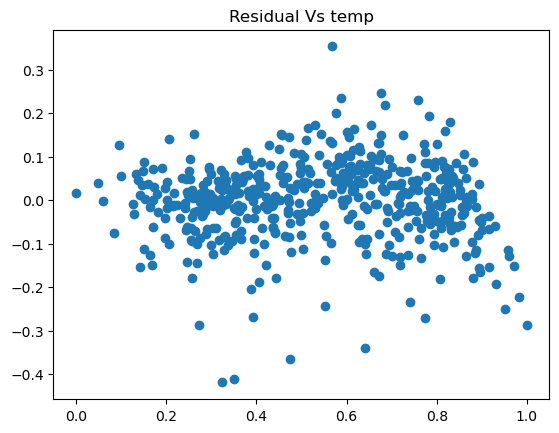

In [89]:
# Look for pattern in residuals against temperature (we should not be able to identify)
plt.scatter(X_train_model6['temp'], res)
plt.title('Residual Vs temp')
plt.show()

#### Observation - We do not see any clear pattern in above scatter plot

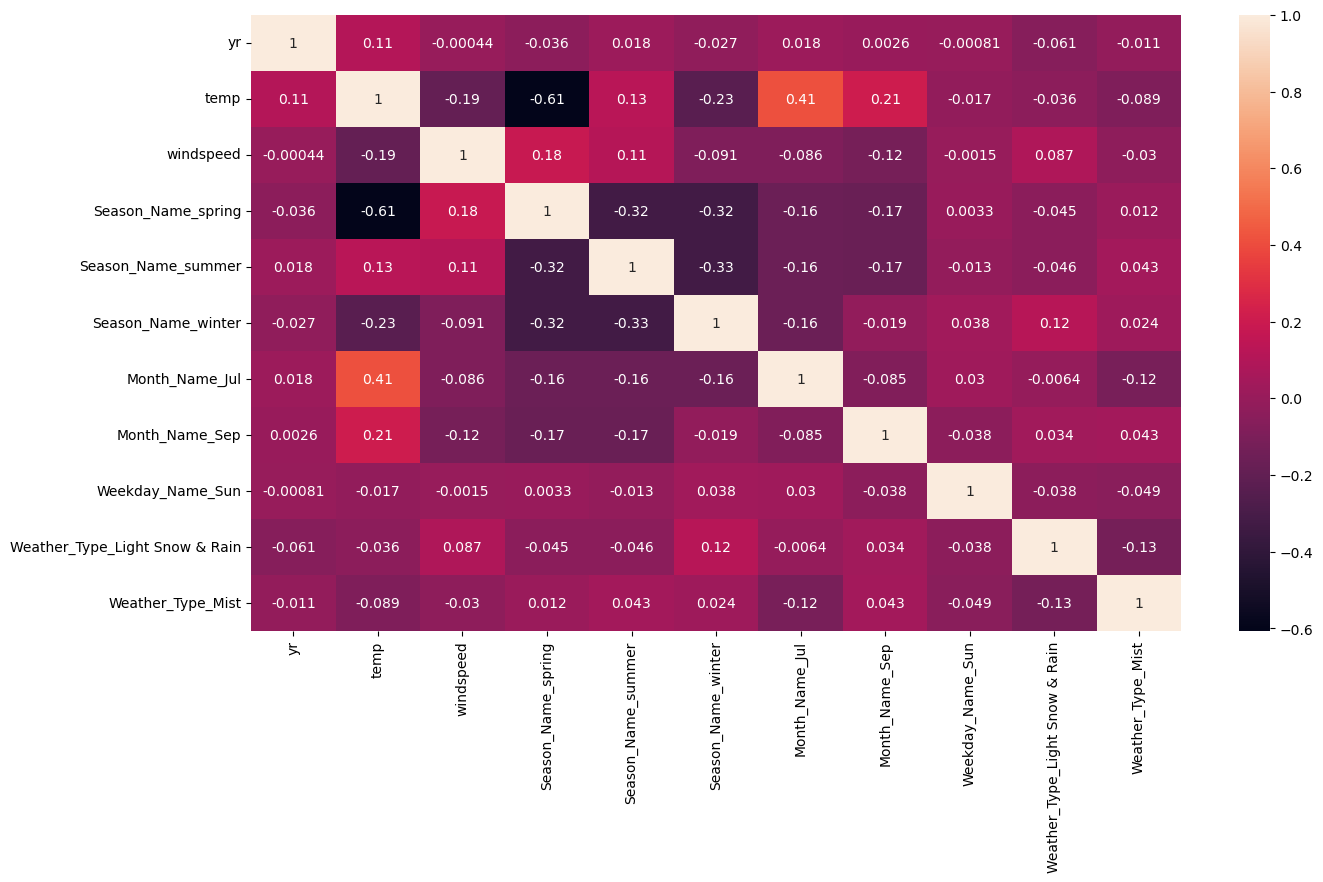

In [90]:
# Check Multicollinearity from Heatmap

plt.figure(figsize=(15,8))
sns.heatmap(X_train6.corr(),annot = True)
plt.show()

### Step 5 --> Predictions and evaluation on the test dataset

In [91]:
# applying scaler on the testdata set , need to do on same variables like we did on train data
# here we do only transform on test data 
df_test[scale_cols] = scaler.transform(df_test[scale_cols])

In [92]:
df_test[scale_cols].head()

,temp,atemp,hum,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029


In [93]:
df_test[scale_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


In [94]:
# Creating X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test 

In [95]:
# X_train6 is X_Train used in our final model lr_model6 so we shall have same columns in the X_test also 
X_test = X_test[X_train6.columns]

In [96]:
# verifying the data in the X_test 
X_test.head()

,yr,temp,windspeed,Season_Name_spring,Season_Name_summer,Season_Name_winter,Month_Name_Jul,Month_Name_Sep,Weekday_Name_Sun,Weather_Type_Light Snow & Rain,Weather_Type_Mist
184,0,0.831783,0.084219,0,0,0,1,0,0,0,1
535,1,0.901354,0.153728,0,1,0,0,0,0,0,0
299,0,0.511964,0.334206,0,0,1,0,0,0,0,1
221,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,1,0,0,0,0,0,0


In [97]:

# adding a contant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,temp,windspeed,Season_Name_spring,Season_Name_summer,Season_Name_winter,Month_Name_Jul,Month_Name_Sep,Weekday_Name_Sun,Weather_Type_Light Snow & Rain,Weather_Type_Mist
184,1.0,0,0.831783,0.084219,0,0,0,1,0,0,0,1
535,1.0,1,0.901354,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0,0,0


In [98]:
# prediction on test data 
y_test_pred = lr_model6.predict(X_test_sm)

In [99]:
# Calculating R2 value 
test_r2 = r2_score(y_true = y_test, y_pred= y_test_pred)
test_r2


0.8057616301094371

In [100]:
round(test_r2,3)

0.806

In [101]:
X_test.shape

(220, 11)

In [102]:
# calculate adjusted-r2 for test data 
# formula is 1-(1-r2)*(n-1)/(n-p-1) where r2 i R squared , n is no of rows in the test data and p is no of predictors 

test_adjusted_r2 = 1 - (1- 0.8057616301094371)*(220-1)/(220-11-1)
round(test_adjusted_r2,3)

0.795

### Observation:

- R2 for train data is **0.836**
- R2 for test data is  **0.806** 
- Adjusted R2 for train data is **0.832**
- Adjusted R2 for test data is **0.795**

### We will evaluate actual test values and predicted test values 


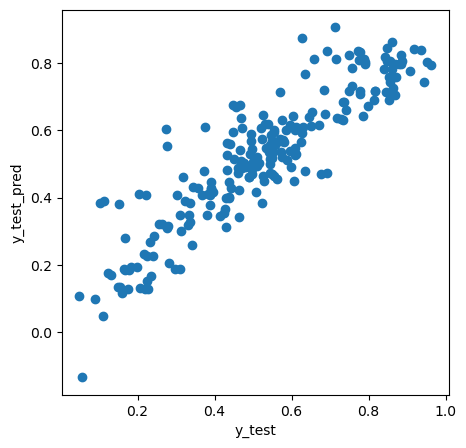

In [103]:
# Plotting y_test and y_test_pred
fig = plt.figure(figsize =(5,5))
plt.scatter(x=y_test, y= y_test_pred)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_test_pred', fontsize = 10) 
plt.show()

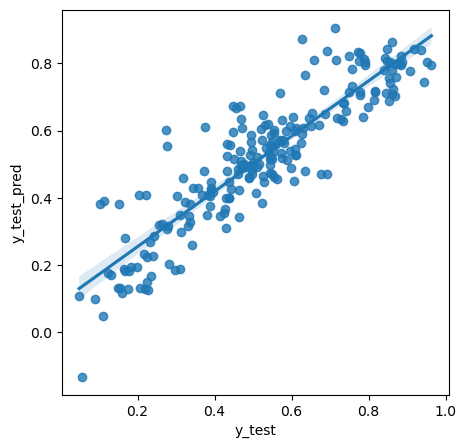

In [104]:
# plotting a regression plot to check the line fit  on the test data 
fig = plt.figure(figsize =(5,5))
sns.regplot(x=y_test, y= y_test_pred,fit_reg=True)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_test_pred', fontsize = 10) 
plt.show()

In [105]:
round(lr_model6.params,4)

const                             0.2034
yr                                0.2339
temp                              0.4917
windspeed                        -0.1497
Season_Name_spring               -0.0682
Season_Name_summer                0.0479
Season_Name_winter                0.0818
Month_Name_Jul                   -0.0483
Month_Name_Sep                    0.0723
Weekday_Name_Sun                 -0.0450
Weather_Type_Light Snow & Rain   -0.2847
Weather_Type_Mist                -0.0802
dtype: float64

## Conclusion of the modeling done on Bike Sharing Demand 
- R2 for Linear Regression Model 6 is 0.836 ie 83.6%
- Adjusted R2 for Linear Regression Model 6 is  0.832 ie 83.2% 
- The equation for the best fit line will be :                                                                                                                     
     **cnt = 0.2034 + ( 0.2339 * yr ) + ( 0.4917 * temp ) - ( 0.1497 * windspeed ) - ( 0.0682 * Season_Name_spring ) + ( 0.0479 * Season_Name_summer ) + ( 0.0818 * Season_Name_winter ) - ( 0.0483 * Month_Name_Jul ) + ( 0.0723 * Month_Name_Sept ) - ( 0.0450 * Weekday_Name_Sun ) - ( 0.2847 * Weather_Type_Light Snow & Rain ) - ( 0.0802 * Weather_Type_Mist )**

- Demand of bike sharing users depends positively on 
  - year 
  - temperature 
  - Summer season 
  - Winter season
  - September Month 
  

- Demand of bike sharing users depends negatively on 
  - Wind speed 
  - Spring Season
  - July Month
  - Sunday
  - Weather with Light Snow & Rain  
  - Weather with Mist                       

